# Analysis of high order epistasis in $\beta$ Lactamase

Studying the order and complexity of epistasis in $\beta$ lactamase. 

In [1]:
# basic imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from data_sets import *
import networkx as nx

# imports from epistasis package
from epistasis.models import LocalEpistasisModel, ProjectedEpistasisModel
from epistasis.plotting import *
from epistasis.knockout import KnockoutModel
from epistasis.utils import enumerate_space

# imports specific to weinreich
from weinreich import *
from graph_pos import INIT_POS

Initial estimates of full order epistasis

In [2]:
space = WeinreichFitnesses(sequence5, rank5)
space.generate_fitnesses(100)

In [4]:
g, binary = enumerate_space('gAEMG', 'aGKTS' )

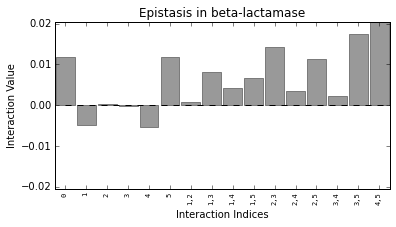

In [6]:
wildtype = '00000'
genotypes = space.sequences
phenotypes = space.fitnesses
errors = space.errors
model = ProjectedEpistasisModel(wildtype, genotypes, phenotypes, regression_order=2, phenotype_errors=errors, log_phenotypes=True)
model.estimate_interactions()
#model.estimate_error()
fig,ax = epistasis_bar(model, sigmas=0, title="Epistasis in beta-lactamase", figsize=[6,3], color='k')
#fig.savefig("figures/weinreich.png", dpi=300, bbox_inches='tight')

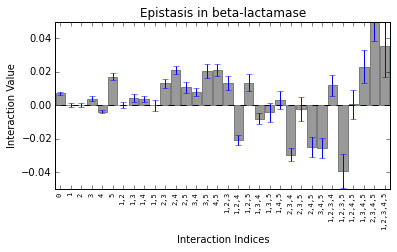

In [7]:
wildtype = '00000'
genotypes = space.sequences
phenotypes = space.fitnesses
errors = space.errors
model = LocalEpistasisModel(wildtype, genotypes, phenotypes, phenotype_errors=errors, log_phenotypes=True)
model.estimate_interactions()
model.estimate_error()
fig,ax = epistasis_bar(model, sigmas=2, title="Epistasis in beta-lactamase", figsize=[6,3], color='k')
fig.savefig("figures/weinreich.png", dpi=300, bbox_inches='tight')

## Trajectories in $\beta$ lactmase sequence space

In [8]:
km = KnockoutModel(model)
ints = km.nonzero_terms(2)
print("All non-zero interactions:")
print(ints)

All non-zero interactions:
{'2,3,4,5': 0.05010619345041098, '2,5': 0.010775039857084525, '0': 0.0071063211987403918, '3,4,5': -0.02552344972363679, '1,2,4': -0.020897927015996371, '2,4,5': -0.024879591075297441, '1,3,4': -0.0079741569393971257, '3,4': 0.0079741569393971257, '1,2,3': 0.013347699327515077, '2,3,4': -0.029486585480007651, '1,2,5': 0.0135676287249386, '5': 0.017125363533323831, '3,5': 0.020472571818401657, '1,2,3,4': 0.011937292695767987, '2,4': 0.020897927015996368, '4': -0.0037725634826725387, '1,2,3,5': -0.039608009881133208, '1,2,3,4,5': 0.035645736062851041, '1,3': 0.0042015934567245887, '1,3,4,5': 0.023112642064391759, '3': 0.0038700967636214603, '1,4': 0.0037725634826725396, '4,5': 0.021321856266912204, '2,3': 0.013255266769702369}


In [23]:
#g,p = km.generate_data(['1,2,3,5', '1,2,4', '2,4,5', '3,4,5', '4'])
#g,p = km.generate_data(['3'])
# double trajectories
#g,p = km.generate_data(['1,2,4', '3,4,5','2,3,4'])
g,p = km.generate_data(['1,2,4', '3,4,5','2,3,4'])


ko_space = SequenceSpace(g,p, probability_func, mutations=MUTATIONS)
ko_traj = ko_space.enumerate_trajectories(5000)
print(len(ko_traj))
#for k in ko_traj:
 #   print(k)

34
00000,00100,10100,10101,11101,11111
00000,00100,00101,00111,10111,11111
00000,00100,01100,11100,11101,01101,01111,11111
00000,00001,01001,11001,11101,01101,01111,11111
00000,00001,01001,01011,01111,11111
00000,00100,00110,00111,10111,11111
00000,00100,01100,11100,11101,11111
00000,00001,00101,01101,01111,11111
00000,00001,00011,10011,10111,11111
00000,00100,00110,01110,01111,11111
00000,00100,00101,01101,01111,11111
00000,00001,00011,10011,11011,11111
00000,00001,00011,00111,01111,11111
00000,00100,01100,11100,11110,11111
00000,00100,10100,11100,11110,11111
00000,00001,01001,11001,11011,11111
00000,00001,01001,01011,11011,11111
00000,00100,10100,11100,11101,11111
00000,00100,01100,01110,01111,11111
00000,00100,01100,01110,11110,11111
00000,00100,10100,10101,11101,01101,01111,11111
00000,00100,00101,00111,01111,11111
00000,00100,00110,01110,11110,11111
00000,00100,10100,11100,11101,01101,01111,11111
00000,00001,00101,00111,10111,11111
00000,00100,10100,10101,10111,11111
00000,00001,0

/Users/Zsailer/virtual/py3/lib/python3.4/site-packages/networkx/linalg/attrmatrix.py:274: RuntimeWarning: invalid value encountered in true_divide
  M /= M.sum(axis=1).reshape((N,1))


In [10]:
space = SequenceSpace(genotypes,phenotypes, probability_func, mutations=MUTATIONS)
traj = space.enumerate_trajectories(5000)
print(len(traj))
for k in traj:
    print(k)

22
00000,00100,10100,10101,11101,11111
00000,00100,01100,11100,11101,01101,01111,11111
00000,00100,10100,11100,11101,01101,01111,11111
00000,00001,01001,01011,01111,11111
00000,00001,01001,11001,11101,01101,01111,11111
00000,00100,01100,11100,11101,11111
00000,00001,00101,01101,01111,11111
00000,00100,10100,10101,10111,11111
00000,00100,00110,01110,01111,11111
00000,00100,00101,01101,01111,11111
00000,00001,00011,00111,01111,11111
00000,00001,00011,00111,10111,11111
00000,00100,00110,00111,10111,11111
00000,00100,10100,11100,11101,11111
00000,00100,10100,10101,11101,01101,01111,11111
00000,00100,00110,01110,11110,11111
00000,00001,00011,10011,10111,11111
00000,00100,00110,00111,01111,11111
00000,00001,01001,11001,11101,11111
00000,00001,00011,01011,01111,11111
00000,00001,01001,01101,01111,11111
00000,00100,01100,01101,01111,11111


/Users/Zsailer/virtual/py3/lib/python3.4/site-packages/networkx/linalg/attrmatrix.py:274: RuntimeWarning: invalid value encountered in true_divide
  M /= M.sum(axis=1).reshape((N,1))


In [10]:
space.G.node['00000']

{'phenotype': 1.0136884250876754}

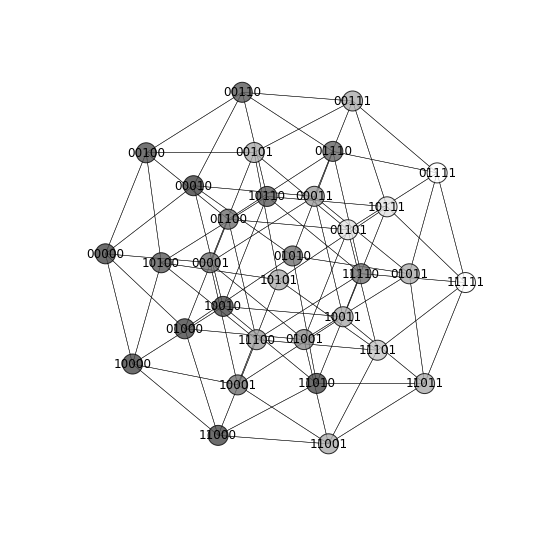

In [11]:
# draw space
pos, fig = draw_space(space.G, pos=INIT_POS)
fig.savefig('figures/weinreich_space.png', dpi=200)

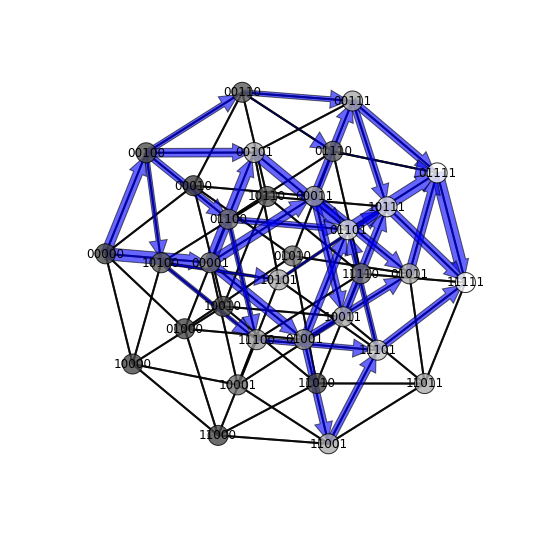

In [15]:
# draw trajectories
pos, fig = draw_traj(space.G,traj, pos=INIT_POS)
fig.savefig('figures/weinreich_traj.png', dpi=200, bbox_inches='tight')

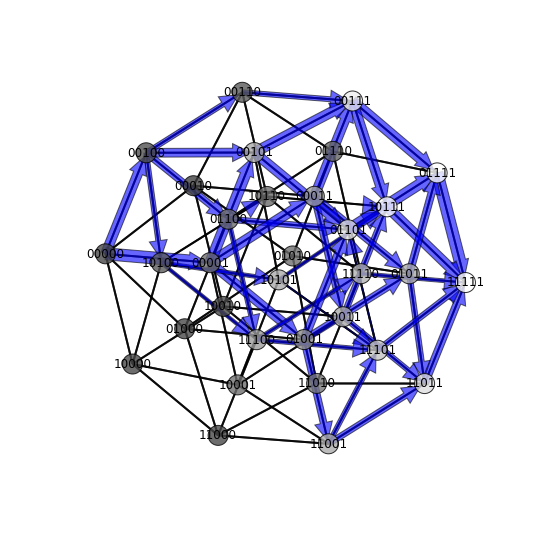

In [16]:
pos, fig = draw_traj(ko_space.G,ko_traj,pos=INIT_POS)
fig.savefig('figures/weinreich_kotraj.png', dpi=200, bbox_inches='tight')